In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


In [3]:
pip install catboost

In [4]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [5]:
# Obtaining data specific to Anantapur

In [6]:
df = df[df['District'] == 'Kurnool']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,NDVI,ARVI,EVI,GCI,NDWI,Crop
1700,1702,15.34,78.32,Kurnool,Banaganpalli,Applapuram,Black,8.62,0.98,0.37,4.10,192.0,7280.0,878.0,58.30,0.43,2.71,13.79,1.04,7.36,0.625925,0.434195,1.698753,2.700348,-0.574500,Chickpea
1701,1703,15.34,78.32,Kurnool,Banaganpalli,Applapuram,Black,8.22,0.31,0.32,5.46,212.0,9156.0,1006.0,4.54,0.40,0.93,13.81,1.29,19.02,0.625925,0.434195,1.698753,2.700348,-0.574500,Chickpea
1702,1704,15.33,78.32,Kurnool,Banaganpalli,Applapuram,Black,8.27,0.41,0.42,9.21,299.0,8995.0,1454.0,13.67,0.40,1.14,13.79,1.27,25.99,0.515956,0.315495,1.404520,1.939759,-0.492355,Chickpea
1703,1705,15.34,78.31,Kurnool,Banaganpalli,Applapuram,Black,8.63,0.23,0.42,4.11,196.0,7970.0,1164.0,3.45,0.44,1.02,12.29,1.03,8.57,0.449421,0.259634,1.428429,1.551268,-0.436821,Pigeonpea
1704,1706,15.34,78.32,Kurnool,Banaganpalli,Applapuram,Black,8.56,0.34,0.22,4.27,200.0,8759.0,1283.0,3.18,0.38,1.16,10.87,1.12,18.94,0.625925,0.434195,1.698753,2.700348,-0.574500,Jowar


In [7]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village', 'ARVI', 'EVI', 'GCI', 'NDWI'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,NDVI
count,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.00000,419.000000
mean,8.078878,0.503532,0.340931,13.386945,147.482100,4108.384248,609.341289,37.721599,0.590931,1.223532,8.589714,1.034702,10.83031,0.374427
std,0.814803,1.165338,0.135438,12.331398,129.432554,3182.061509,535.419100,162.388020,0.592986,1.359873,5.699854,0.537233,5.70459,0.173435
min,5.210000,0.030000,0.060000,0.540000,23.000000,145.000000,27.000000,1.690000,0.130000,0.110000,0.740000,0.250000,1.40000,0.118289
25%,7.640000,0.180000,0.260000,4.680000,92.000000,995.000000,201.500000,5.160000,0.320000,0.485000,4.870000,0.680000,6.55500,0.231633
50%,8.300000,0.280000,0.330000,9.350000,133.000000,3474.000000,480.000000,8.450000,0.400000,0.860000,7.320000,0.950000,9.74000,0.301587
75%,8.680000,0.400000,0.410000,19.265000,181.000000,7279.000000,941.000000,18.085000,0.615000,1.400000,10.830000,1.210000,13.60500,0.522124
max,9.430000,16.950000,1.050000,109.090000,2409.000000,9538.000000,5363.000000,2539.580000,6.110000,13.730000,41.370000,3.440000,40.17000,0.750000


In [8]:
# Analysis of SoilType

In [9]:
df.SoilType.unique()

array(['Black', 'Nalla regadi', 'Red', 'Chowdu', 'Black & Red', 'Garuku',
       'Red ', 'Sowdu', 'Sudda', 'Thella kattu', 'Black & Mooru',
       'Chowdu +Nalla regadi', 'Sand+Ondu+White', 'Sudda Neela',
       'Sand +Ondu', 'Sand', 'Gurugu ', 'Tella masaka',
       'Chowdu + Nalla regadi', 'Nalla savudu', 'Regadi', 'Black, chowdu',
       'Chowdu+ Nalla regadi', 'Chowdu+ Red', 'Chowdu +Black',
       'Erra maska', 'Nalla regadi + chowdu', 'Sand +Chowdu',
       'Chowdu Sudda', 'Black + Chowdu', 'Chowdu + Black', 'sand', 'red',
       'Alkhaline'], dtype=object)

In [10]:
df['SoilType'] = df['SoilType'].replace(['Red', 'red', 'Chowdu+ Red', 'Red '], 'Red Soil')
df['SoilType'] = df['SoilType'].replace(['Black', 'Black, chowdu', 'Black + Chowdu', 'Black & Mooru'], 'Black Soil')
df = df[(df['SoilType'] == 'Red Soil') | (df['SoilType'] == 'Black Soil')]

In [11]:
soilCount = dict(df['SoilType'].value_counts())
for i in soilCount.keys():
    if i not in ['Red Soil', 'Black Soil']:
        soilCount.pop(i)
soilCount

{'Black Soil': 152, 'Red Soil': 156}

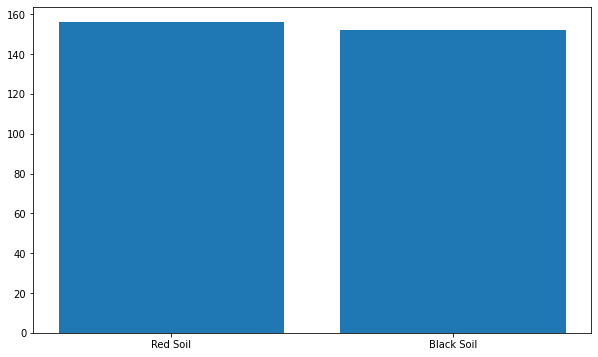

In [12]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)
df = df.drop(['SoilType'], axis=1)

In [13]:
# Analysis of Crops grown 

In [14]:
df.Crop.unique()

array(['Chickpea', 'Pigeonpea', 'Jowar', 'Coriandam', 'Blackgram',
       'Bengalgram', 'Redgram', 'Cotton', 'Paddy', 'JOWAR', 'Paddy,jowar',
       'Fodder Crops', 'Dhanyalu', 'Jonna, Senaga', 'Senaga', 'Pogaku',
       'Mahendra Jonna', 'Merappa ; Senaga', 'Menumu', 'Pacha Jonna',
       'Jonna', 'Vari', 'Sunflower', 'Cottan', 'Ground Nat,Cottan',
       'Oniyan,Ground Nat', 'cotton', 'ground nut',
       'ground nut/groundnut', 'groundnut', 'Cottan,Ground Nat',
       'Grounat', 'Ground Nat', 'Cottan ,Groundnat', 'Cottan,',
       'Groundnut', 'Groundnut,Cottan', 'Ground nut,Cottan',
       'Cottan,Castral', 'GroundNut', 'Castor', 'GroundNut,Cotton',
       'Ground nut', 'Cotton,Vegitable', 'Ground nut,castor',
       'Ground nut ,Mirchi', 'Cotton,Ground Nut', 'Ground Nut',
       'Cotton,castor', 'Ground Nut, Cotton', 'Ground Nut,jowar',
       'Ground Nut ,Cotton', 'Clastor', 'Cotton,Groundnut'], dtype=object)

In [15]:
df['Crop'].value_counts()

Cotton                  82
Groundnut               43
Cottan                  16
Bengalgram              13
Jowar                   11
Senaga                  10
Ground Nut               9
Paddy                    9
Coriandam                8
Jonna                    8
GroundNut                7
Vari                     7
Mahendra Jonna           6
Sunflower                6
Dhanyalu                 5
Ground Nat               5
Cottan,Ground Nat        5
ground nut/groundnut     4
Blackgram                4
Redgram                  4
cotton                   4
Chickpea                 3
Ground nut,castor        2
Groundnut,Cottan         2
Pacha Jonna              2
Cotton,Ground Nut        2
Paddy,jowar              2
Ground Nut,jowar         2
Clastor                  2
Pogaku                   1
Oniyan,Ground Nat        1
groundnut                1
Ground Nat,Cottan        1
Grounat                  1
Ground nut               1
Cottan ,Groundnat        1
Jonna, Senaga            1
C

GroundNut + Cotton    200
Jowar                  30
BengalGram             25
Coriander              13
Name: Crop, dtype: int64


<BarContainer object of 4 artists>

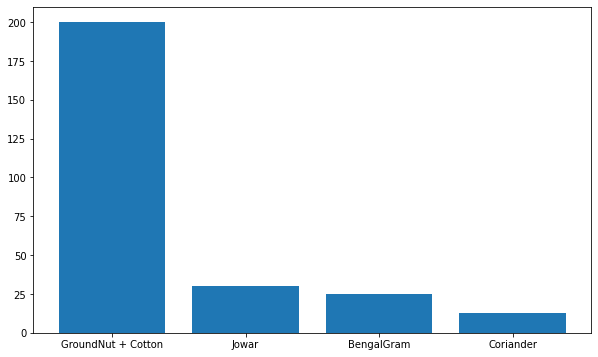

In [16]:
df['Crop'] = df['Crop'].replace('chill', 'Chilli')
df['Crop'] = df['Crop'].replace(['MAZI', 'maize', 'Mazi'], 'Maize')
df['Crop'] = df['Crop'].replace(['Bengalgram', 'Senaga', 'Merappa ; Senaga', 'Erra senaga', 'Jonna, Senaga', 'Jonna/Senaga'], 'BengalGram')
df['Crop'] = df['Crop'].replace(['jowar', 'Jowar', 'JOWAR', 'Jonna', 'Mahendra Jonna', 'Pacha Jonna', 'Erra Jonna', 'Veru senaga, Jonna', 'Jonna+ sunflower', 'Paddy,jowar'],'Jowar')
df['Crop'] = df['Crop'].replace('Vari','BarnyardMillet')
df['Crop'] = df['Crop'].replace(['Dhanyalu', 'Coriandam', 'Dhanyalu , Jonnalu'], 'Coriander')
df['Crop'] = df['Crop'].replace(['Oniyan,Ground Nat', 'ground nut', 'ground nut/groundnut', 'groundnut', 'Grounat', 'Ground Nat', 'Groundnut', 'GroundNut', 'Ground nut', 'Ground nut,castor', 'Ground nut ,Mirchi', 'Ground Nut', 'Ground Nut,jowar'],'GroundNut')
df['Crop'] = df['Crop'].replace(['Cottan', 'cotton', 'Cottan,', 'Cottan,Castral', 'Cotton,Vegitable', 'Cotton,castor'],'Cotton')
df['Crop'] = df['Crop'].replace(['Ground Nat,Cottan', 'Cottan,Ground Nat', 'Cottan ,Groundnat', 'Groundnut,Cottan', 'Ground nut,Cottan', 'GroundNut,Cotton', 'Cotton,Ground Nut', 'Ground Nut, Cotton', 'Ground Nut ,Cotton', 'Cotton,Groundnut', 'Cotton', 'GroundNut'], 'GroundNut + Cotton')
df = df[(df['Crop'] != 'Clastor') & (df['Crop'] != 'Castor') & (df['Crop'] != 'Onian') & (df['Crop'] != 'Korra, Maagu') & (df['Crop'] != 'Menumu') & (df['Crop'] != 'Peasara + Pacha Gaddi')]
df = df[(df['Crop'] != 'Chickpea') & (df['Crop'] != 'Pigeonpea') & (df['Crop'] != 'Blackgram') & (df['Crop'] != 'Redgram') & (df['Crop'] != 'Fodder Crops') & (df['Crop'] != 'Pogaku')]
df = df[(df['Crop'] != 'Sunflower') & (df['Crop'] != 'Paddy') & (df['Crop'] != 'BarnyardMillet')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [17]:
# Getting rid of features that have a high correlation among one another

In [18]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,NDVI
pH,1.000000,0.154452,0.143359,-0.396558,0.348434,0.626301,0.642893,0.074972,-0.126218,0.371529,-0.279575,0.103744,-0.426539,0.184149
EC,0.154452,1.000000,0.046686,-0.090044,0.137063,0.171919,0.156968,0.898053,-0.009671,0.760777,-0.011341,0.054006,-0.050767,0.105132
OC,0.143359,0.046686,1.000000,0.354102,0.602425,0.190425,0.240549,0.025472,0.320512,0.154228,0.095769,0.462408,0.264084,-0.003708
P,-0.396558,-0.090044,0.354102,1.000000,0.082333,-0.508645,-0.382889,-0.064294,0.469405,-0.227254,-0.046002,-0.003312,0.186107,-0.161262
K,0.348434,0.137063,0.602425,0.082333,1.000000,0.523478,0.526675,0.077524,0.152489,0.333931,0.255874,0.406623,0.190940,0.118590
Ca,0.626301,0.171919,0.190425,-0.508645,0.523478,1.000000,0.909771,0.137600,-0.178579,0.484745,0.301247,0.380660,0.003488,0.348060
Mg,0.642893,0.156968,0.240549,-0.382889,0.526675,0.909771,1.000000,0.128820,-0.058152,0.528310,0.230898,0.459196,0.021749,0.302515
S,0.074972,0.898053,0.025472,-0.064294,0.077524,0.137600,0.128820,1.000000,0.002534,0.762968,0.000587,0.048406,-0.015404,0.096774
Zn,-0.126218,-0.009671,0.320512,0.469405,0.152489,-0.178579,-0.058152,0.002534,1.000000,0.034307,-0.068955,0.273181,0.216550,-0.014582
B,0.371529,0.760777,0.154228,-0.227254,0.333931,0.484745,0.528310,0.762968,0.034307,1.000000,0.073986,0.261500,-0.028932,0.206583


In [19]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)

Columns to be dropped :  ['K', 'Ca', 'Mg', 'S', 'B', 'Mn']


In [20]:
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns taken into consideration :  ['pH', 'EC', 'OC', 'P', 'Zn', 'Fe', 'Cu', 'NDVI', 'Crop']


In [21]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [22]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

        pH    EC    OC     P    Zn     Fe    Cu      NDVI
1704  8.56  0.34  0.22  4.27  0.38  10.87  1.12  0.625925
1704    Jowar
Name: Crop, dtype: object


In [23]:
# Standardizing the independent variables using Feature Scaling
sc1 = StandardScaler()
X[:, :] = sc1.fit_transform(X[:, :])

In [24]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [25]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [26]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [27]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7164179104477612


In [28]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 76.62 %
Standard Deviation: 3.88 %


# Decision Tree Classifier

In [29]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [30]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [31]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7761194029850746


In [32]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 74.67 %
Standard Deviation: 8.62 %


# Random Forest Classifier

In [33]:
clf3 = RandomForestClassifier(random_state=0)
clf3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [34]:
y_test_pred = clf3.predict(X_test)
y_train_pred = clf3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [35]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8208955223880597


In [36]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 79.12 %
Standard Deviation: 4.26 %


In [37]:
pickle.dump(clf3, open('Kurnool_model.pkl', 'wb'))
pickle.dump(sc1, open('Kurnool_scaler.pkl', 'wb'))

# XGBoost

In [38]:
clf4 = HistGradientBoostingClassifier(random_state=0)
clf4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [39]:
y_test_pred = clf4.predict(X_test)
y_train_pred = clf4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [40]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8208955223880597


In [41]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4, X = X_train, y = y_train, cv = 10)

In [42]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 77.62 %
Standard Deviation: 4.56 %


# Multi-layer Perceptron Classifier

In [43]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [44]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [45]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.8407960199004975
Testing Accuracy:  0.7761194029850746


In [46]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 81.57 %
Standard Deviation: 4.56 %


# Catboost

In [ ]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 3)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 0.7039988	total: 46.6ms	remaining: 4.61s
1:	learn: 0.5290351	total: 47.6ms	remaining: 2.33s
2:	learn: 0.4710836	total: 48.3ms	remaining: 1.56s
3:	learn: 0.4449563	total: 49ms	remaining: 1.18s
4:	learn: 0.4184771	total: 49.9ms	remaining: 948ms
5:	learn: 0.3917865	total: 50.7ms	remaining: 794ms
6:	learn: 0.3861805	total: 51.4ms	remaining: 683ms
7:	learn: 0.3720060	total: 52ms	remaining: 598ms
8:	learn: 0.3683118	total: 52.7ms	remaining: 532ms
9:	learn: 0.3375613	total: 53.4ms	remaining: 481ms
10:	learn: 0.3193302	total: 54.1ms	remaining: 438ms
11:	learn: 0.3024793	total: 54.8ms	remaining: 402ms
12:	learn: 0.2922505	total: 55.5ms	remaining: 371ms
13:	learn: 0.2821708	total: 56.2ms	remaining: 345ms
14:	learn: 0.2761309	total: 56.9ms	remaining: 323ms
15:	learn: 0.2732845	total: 57.6ms	remaining: 303ms
16:	learn: 0.2633146	total: 58.4ms	remaining: 285ms
17:	learn: 0.2489180	total: 59.2ms	remaining: 270ms
18:	learn: 0.2463880	total: 59.8ms	remaining: 255ms
19:	learn: 0.2431487	total

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.5775550211
bestIteration = 99

Training on fold [1/5]

bestTest = 0.5811120589
bestIteration = 99

Training on fold [2/5]

bestTest = 0.5821337708
bestIteration = 99

Training on fold [3/5]

bestTest = 0.5353310827
bestIteration = 99

Training on fold [4/5]

bestTest = 0.5763913631
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Streaming output truncated to the last 5000 lines.
11:	learn: 1.0677163	test: 1.0853900	best: 1.0853900 (11)	total: 13.8ms	remaining: 1.14s
12:	learn: 1.0490690	test: 1.0676100	best: 1.0676100 (12)	total: 15ms	remaining: 1.14s
13:	learn: 1.0339297	test: 1.0538529	best: 1.0538529 (13)	total: 16.2ms	remaining: 1.14s
14:	learn: 1.0146543	test: 1.0347634	best: 1.0347634 (14)	total: 17.4ms	remaining: 1.15s
15:	learn: 0.9991644	test: 1.0199349	best: 1.0199349 (15)	total: 18.7ms	remaining: 1.15s
16:	learn: 0.9826443	test: 1.0036337	best: 1.0036337 (16)	total: 19.8ms	remaining: 1.15s
17:	learn: 0.9672494	test: 0.9904187	best: 0.9904187 (17)	total: 21ms	remaining: 1.15s
18:	learn: 0.9497310	test: 0.9723059	best: 0.9723059 (18)	total: 22.2ms	remaining: 1.15s
19:	learn: 0.9362251	test: 0.9582428	best: 0.9582428 (19)	total: 23.4ms	remaining: 1.14s
20:	learn: 0.9214635	test: 0.9441232	best: 0.9441232 (20)	total: 24.5ms	remaining: 1.14s
21:	learn: 0.9086262	test: 0.9315485	best: 0.9315485 (21)	total